In [1]:
import pandas as pd
import numpy as np

import warnings

warnings.filterwarnings('ignore')

df=pd.read_csv('D3.csv')

print(df.info())
print(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51766 entries, 0 to 51765
Data columns (total 30 columns):
race                        50750 non-null object
gender                      51766 non-null object
age                         51756 non-null object
admission_type_id           51766 non-null int64
discharge_disposition_id    51766 non-null int64
admission_source_id         51766 non-null int64
time_in_hospital            51766 non-null int64
medical_specialty           51766 non-null object
num_lab_procedures          51766 non-null int64
num_procedures              51766 non-null int64
num_medications             51766 non-null int64
number_outpatient           51766 non-null int64
number_emergency            51766 non-null int64
number_inpatient            51766 non-null int64
number_diagnoses            51766 non-null int64
max_glu_serum               51766 non-null object
A1Cresult                   51766 non-null object
metformin                   51766 non-null object
re

1. What pre-processing was required on the dataset before regression modelling? What distribution split between training and test datasets have you used?

In [2]:
for col in df:
    print(df[col].unique())


['Caucasian' 'AfricanAmerican' 'Hispanic' nan 'Other' 'Asian']
['Female' 'Male' 'Unknown/Invalid']
['[60-70)' '[80-90)' '[70-80)' '[40-50)' '[50-60)' '[90-100)' '[30-40)'
 '[20-30)' '[10-20)' '[0-10)' nan]
[2 3 1 5 6 8 7 4]
[ 1  2  6  3 22 11  7 23 13  4 15  9 28  5 19  8 25 14 24 27 18]
[ 1  7  5 17  4  2  3  6  9 10 22 20  8 14 11 25 13]
[ 4  8  2  7  3  6  5  1 13 12 11  9 10 14]
['InternalMedicine' 'Invalid' 'Cardiology' 'Emergency/Trauma' 'Neurology'
 'Surgery-General' 'Family/GeneralPractice'
 'Surgery-Cardiovascular/Thoracic' 'Surgery-Vascular' 'Oncology'
 'Osteopath' 'Surgery-Neuro' 'Radiologist' 'Nephrology' 'Pulmonology'
 'Orthopedics-Reconstructive' 'Gastroenterology' 'Surgery-Plastic'
 'Surgery-Pediatric' 'Psychiatry' 'Orthopedics' 'Urology'
 'Surgery-Cardiovascular' 'Gynecology' 'PhysicalMedicineandRehabilitation'
 'ObstetricsandGynecology' 'Hematology/Oncology' 'Podiatry'
 'Otolaryngology' 'Surgeon' 'Pediatrics' 'Psychology' 'Hematology'
 'OutreachServices' 'Endocrinology

In [3]:
for col in df:
    print(df[col].value_counts())

Caucasian          40388
AfricanAmerican     8070
Hispanic            1018
Other                896
Asian                378
Name: race, dtype: int64
Female             27718
Male               24044
Unknown/Invalid        4
Name: gender, dtype: int64
[70-80)     12972
[60-70)     11618
[80-90)      9671
[50-60)      8482
[40-50)      4619
[30-40)      1717
[90-100)     1616
[20-30)       815
[10-20)       223
[0-10)         23
Name: age, dtype: int64
1    29737
3    10481
2     8776
5     1478
6     1107
8      165
7       19
4        3
Name: admission_type_id, dtype: int64
1     30868
3      8105
6      7594
22     1290
2      1149
11      796
7       355
4       329
13      300
14      235
5       232
23      231
28      120
24       44
15       42
18       23
9        18
25       14
8        10
19        7
27        4
Name: discharge_disposition_id, dtype: int64
7     33472
1     15913
4       856
17      705
2       330
5       245
6       182
3        22
22       12
8         8
9

In [4]:
# preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

def data_prep():
    df=pd.read_csv('D3.csv')
    
    # impute missing values in race with 'Caucasian', which is the mode 
    df['race'] = df['race'].fillna('Caucasian')
    # replace nan values in age with '[70-80)', which is the mode
    df['age'] = df['age'].fillna('[70-80)')
    # drop 'invalid' in gender
    indexNames = df[ df['gender'] == 'Unknown/Invalid' ].index
    df.drop(indexNames , inplace=True)    
    # impute nan values in chlorpropamide with 'No', which is the mode 
    df['chlorpropamide'] = df['chlorpropamide'].fillna('No') 
    # one-hot encoding
    df = pd.get_dummies(df)
    # target/input split
    y = df['readmitted']
    X = df.drop(['readmitted'], axis=1)
    # setting random state
    rs = 10
    
    X_mat = X.to_numpy()
    X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)
    
    return df,X,y,X_train, X_test, y_train, y_test

# set the random seed - consistent
rs = 10

# load the data
df,X,y,X_train, X_test, y_train, y_test = data_prep()

In [5]:
#Standardisation
from sklearn.preprocessing import StandardScaler
# initialise a standard scaler object
scaler = StandardScaler()
# visualise min, max, mean and standard dev of data before scaling
print("Before scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))
# learn the mean and std.dev of variables from training data
# then use the learned values to transform training data
X_train = scaler.fit_transform(X_train, y_train)

print("After scaling\n-------------")
for i in range(5):
    col = X_train[:,i]
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".
          format(i, min(col), max(col), np.mean(col), np.std(col)))

X_test = scaler.transform(X_test)

Before scaling
-------------
Variable #0: min 1, max 8, mean 1.82 and std dev 1.22
Variable #1: min 1, max 28, mean 3.15 and std dev 4.32
Variable #2: min 1, max 25, mean 5.19 and std dev 3.11
Variable #3: min 1, max 14, mean 4.23 and std dev 2.86
Variable #4: min 1, max 132, mean 43.81 and std dev 19.94
After scaling
-------------
Variable #0: min -0.6777662361543298, max 5.08014795718209, mean -0.00 and std dev 1.00
Variable #1: min -0.49785477743146145, max 5.7490585959390055, mean -0.00 and std dev 1.00
Variable #2: min -1.3499301584429892, max 6.37363003276129, mean 0.00 and std dev 1.00
Variable #3: min -1.1310018711799137, max 3.4197966696183126, mean 0.00 and std dev 1.00
Variable #4: min -2.1466093215785107, max 4.422579763839452, mean -0.00 and std dev 1.00


2. Build a regression model using the default regression method with all inputs. 

Build another regression model tuned with GridSearchCV. 

Now, choose a better model to answer the followings:
a. Explain why you chose that model.
b. Name the regression function used.
c. Did you apply standardization of variables? Why would you normalise the variables for regression mining?
d. Report the variables included in the regression model.
e. Report the top-5 important variables (in the order) in the model.
f. What is the classification accuracy on training and test datasets?
g. Report any sign of overfitting in this model.

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
# Build the first regression model using the default regression method
model = LogisticRegression(random_state=rs)

# fit it to training data
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
# training and test accuracy
print("Train accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# classification report on test data
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

Train accuracy: 0.6356084232605635
Test accuracy: 0.6318500869341233
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      8381
           1       0.65      0.43      0.52      7148

   micro avg       0.63      0.63      0.63     15529
   macro avg       0.64      0.62      0.61     15529
weighted avg       0.64      0.63      0.62     15529



In [9]:
print(model.coef_)

[[-2.37115660e-02 -5.45897340e-02 -8.75228159e-03  1.21123190e-02
   2.58212117e-02 -6.28629359e-02  4.33629483e-02  1.14404735e-01
   3.11380928e-01  5.19112325e-01  7.78279544e-02  3.56052678e-02
   1.54269634e-01 -3.73962118e-04 -4.95577924e-02  3.84655837e-02
  -6.43983654e-02 -1.71327988e-02  2.33957412e-02 -2.33957412e-02
  -2.97468240e-02 -1.04342656e-02 -2.64746170e-02 -4.34069852e-02
  -3.33739123e-02 -1.33125148e-02  1.09409303e-02  2.97233815e-02
   3.98733004e-02 -3.56976254e-02  0.00000000e+00 -2.57173512e-02
   9.20745519e-02 -7.59045208e-02  2.99016942e-02  4.63480267e-03
   1.12493975e-02  1.47563410e-03  2.80371399e-02 -1.34426556e-02
   2.11657669e-02 -7.55870810e-03 -4.13505598e-03 -5.92680243e-03
  -8.48242786e-02  6.49205660e-02  1.40857996e-02 -1.86473608e-02
   0.00000000e+00 -8.23037227e-03 -5.56036625e-02 -5.48956961e-03
  -9.26543413e-03 -2.52979889e-02 -5.03644012e-02 -2.47238042e-02
  -2.39164219e-02  5.58941366e-03 -1.22812471e-03  2.46923378e-03
  -3.68160

In [10]:
feature_names = X.columns
coef = model.coef_[0]

# limit to 20 features, you can comment the following line to print out everything
coef = coef[:20]

for i in range(len(coef)):
    print(feature_names[i], ':', coef[i])

admission_type_id : -0.023711566042883613
discharge_disposition_id : -0.05458973402052124
admission_source_id : -0.008752281593469993
time_in_hospital : 0.012112319003961017
num_lab_procedures : 0.02582121171091367
num_procedures : -0.06286293591115166
num_medications : 0.04336294833191577
number_outpatient : 0.11440473483660556
number_emergency : 0.31138092840185494
number_inpatient : 0.5191123248634968
number_diagnoses : 0.0778279544298856
change : 0.0356052678281172
diabetesMed : 0.15426963438460167
race_AfricanAmerican : -0.00037396211823091376
race_Asian : -0.04955779237222553
race_Caucasian : 0.03846558369279307
race_Hispanic : -0.06439836535624717
race_Other : -0.017132798802756487
gender_Female : 0.023395741170461164
gender_Male : -0.023395741170461164


In [11]:
# grab feature importances from the model and feature name from the original X
coef = model.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]
for i in indices:
    print(feature_names[i], ':', coef[i])

number_inpatient : 0.5191123248634968
number_emergency : 0.31138092840185494
diabetesMed : 0.15426963438460167
number_outpatient : 0.11440473483660556
medical_specialty_Cardiology-Pediatric : 0.09207455191376471
medical_specialty_InternalMedicine : -0.08482427861287324
number_diagnoses : 0.0778279544298856
medical_specialty_DCPTEAM : -0.07590452079418566
medical_specialty_Invalid : 0.06492056602433895
medical_specialty_Radiology : -0.06474410278116352
race_Hispanic : -0.06439836535624717
num_procedures : -0.06286293591115166
insulin_Steady : -0.05964475667663149
medical_specialty_ObstetricsandGynecology : -0.05560366252054035
discharge_disposition_id : -0.05458973402052124
medical_specialty_Surgery-Maxillofacial : -0.05210392221961772
medical_specialty_Orthopedics-Reconstructive : -0.050364401190382206
race_Asian : -0.04955779237222553
medical_specialty_Surgery-Neuro : -0.04752480811119209
age_[30-40) : -0.043406985188810254


In [12]:
#Building another model tuned with GridSearchCV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

# use all cores to tune logistic regression with C parameter
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs),
                  return_train_score=True, cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [13]:
result_set = cv.cv_results_
print(result_set)

{'mean_fit_time': array([0.59142816, 0.8382031 , 1.17076159, 1.78881886, 2.22691658,
       2.9170182 , 3.61464558, 3.63503797, 3.63422248, 3.04020803]), 'std_fit_time': array([0.07098976, 0.01745082, 0.02831419, 0.04777508, 0.06930022,
       0.0601119 , 0.08222924, 0.06739709, 0.07606039, 0.58227606]), 'mean_score_time': array([0.00738049, 0.00437927, 0.00339077, 0.00329115, 0.00405574,
       0.00156224, 0.00624917, 0.00342364, 0.00319152, 0.00210812]), 'std_score_time': array([0.00179523, 0.00230887, 0.00066129, 0.00045668, 0.0040021 ,
       0.00468671, 0.00765363, 0.00616323, 0.00059818, 0.00053037]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

In [14]:
cv_best = cv.best_estimator_
cv_best.coef_ # 
coef2 = cv_best.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef2))
indices = np.flip(indices, axis=0)
# limit to 5 features
indices = indices[:5]
for i in indices:
    print(feature_names[i], ':', coef2[i])

number_inpatient : 0.5192022958161517
number_emergency : 0.3114841568408783
diabetesMed : 0.15431224186529618
number_outpatient : 0.11440629583283536
medical_specialty_Cardiology-Pediatric : 0.09524684082536003


In [15]:
import matplotlib.pyplot as plt
train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

Total number of models:  10


<Figure size 640x480 with 1 Axes>

Total number of models:  10


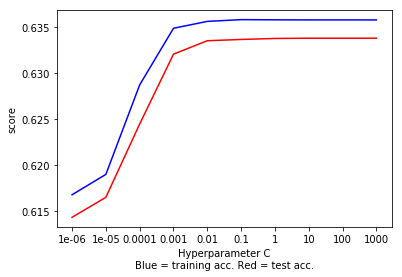

In [16]:
import matplotlib.pyplot as plt
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

In [17]:
print(cv.best_params_)

{'C': 10}


In [18]:
cv.fit(X_train, y_train)

print("Train accuracy:", cv.score(X_train, y_train))
print("Test accuracy:", cv.score(X_test, y_test))

Train accuracy: 0.6356360224105098
Test accuracy: 0.6318500869341233


In [19]:
# classification report on test data
y_pred = cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70      8381
           1       0.65      0.43      0.52      7148

   micro avg       0.63      0.63      0.63     15529
   macro avg       0.64      0.62      0.61     15529
weighted avg       0.64      0.63      0.62     15529



3. Build another regression model on the reduced variables set. Perform dimensionality reduction with Recursive feature elimination. Tune the model with GridSearchCV to find the best parameter setting. Answer the followings:
a. Was dimensionality reduction useful to identify a good feature set for building the accurate model?
b. What is the classification accuracy on training and test datasets?
c. Report any sign of overfitting.
d. Report the top-3 important variables (in the order) in the model.

In [20]:
from sklearn.feature_selection import RFECV
rs=10
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10, n_jobs= -1)
rfe.fit(X_train, y_train) # run the RFECV

# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

Original feature set 124
Number of features after elimination 113


In [21]:
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)


In [22]:
# grid search CV
params = {'C': [pow(10, x) for x in range(-6, 4)]}

rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X_train_rfe, y_train)

# test the best model
print("Train accuracy:", rfe_cv.score(X_train_rfe, y_train))
print("Test accuracy:", rfe_cv.score(X_test_rfe, y_test))

y_pred = rfe_cv.predict(X_test_rfe)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(rfe_cv.best_params_)

Train accuracy: 0.6355808241106174
Test accuracy: 0.631785691287269
              precision    recall  f1-score   support

           0       0.62      0.80      0.70      8381
           1       0.65      0.43      0.52      7148

   micro avg       0.63      0.63      0.63     15529
   macro avg       0.64      0.62      0.61     15529
weighted avg       0.64      0.63      0.62     15529

{'C': 1}


In [23]:
# grab feature importances from the model and feature name from the model
rfe_cv = rfe_cv.best_estimator_
rfe_cv.coef_ # 
coef3 = rfe_cv.coef_[0]
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef3))
indices = np.flip(indices, axis=0)
# limit to 3 features
indices = indices[:3]
for i in indices:
    print(feature_names[i], ':', coef3[i])
    

number_inpatient : 0.5191144391032018
number_emergency : 0.311372690519885
diabetesMed : 0.1542734255982301


4. Produce the ROC curve for all different regression models. Using the best regression model, can you identify which patients could potentially “readmitted”? Can you provide general characteristics of those patients?

In [24]:
#ROC curve

In [25]:
from sklearn.metrics import roc_auc_score

y_pred_proba_lr = model.predict_proba(X_test)
y_pred_proba_cv= cv.predict_proba(X_test)
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X_test_rfe)



roc_index_lr = roc_auc_score(y_test, y_pred_proba_lr[:, 1])
roc_index_cv= roc_auc_score(y_test, y_pred_proba_cv[:, 1])
roc_index_rfe_cv = roc_auc_score(y_test, y_pred_proba_rfe_cv[:, 1])



print("ROC index on test for logestic regression_default:", roc_index_lr)
print("ROC index on test for lr with gridsearch :", roc_index_cv)
print("ROC index on test for lr with feature selection and gridsearch:", roc_index_rfe_cv)


from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr[:,1])
fpr_cv, tpr_cv, thresholds_cv= roc_curve(y_test, y_pred_proba_cv[:,1])
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y_test, y_pred_proba_rfe_cv[:,1])


ROC index on test for logestic regression_default: 0.668464522272278
ROC index on test for lr with gridsearch : 0.6684648394284859
ROC index on test for lr with feature selection and gridsearch: 0.6684444746614557


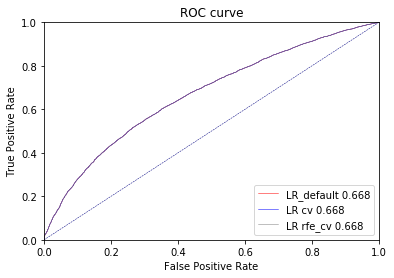

In [26]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='LR_default {:.3f}'.format(roc_index_lr), color='red', lw=0.5)

plt.plot(fpr_cv, tpr_cv, label='LR cv {:.3f}'.format(roc_index_cv), color='blue', lw=0.5)

plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='LR rfe_cv {:.3f}'.format(roc_index_rfe_cv), color='gray', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")

plt.savefig("123.png")
plt.show()